<a href="https://colab.research.google.com/github/KENG85/colab_notebooks/blob/main/hs_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load The Data

---



In [192]:
#from google.colab import auth
#auth.authenticate_user()
from sklearn import tree
import pandas as pd
import os
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

wks = gc.open('Part 2 | Movement Screen (Responses)')
hist =  gc.open('Part 1 | Posture Assessmnt')

# get worksheets
mvmt = wks.worksheet('Data')
player_hist = hist.worksheet('Posture_Assessment')

# get_all_values gives a list of rows.
rows = mvmt.get_all_values()
rows2 = player_hist.get_all_values()

In [193]:
data_mvmt = pd.DataFrame.from_records(rows[1:], columns=rows[0])
data_hist = pd.DataFrame.from_records(rows2[1:], columns=rows2[0])

In [194]:
data_mvmt.head()

,Timestamp,Subject ID,test,limb,foot_out,foot_rise,foot_flatten,valgus,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse,Anterior View,Posterior View,Lateral View
0,3/2/2021 13:56:34,241058,OH Squat,BILATERAL,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,https://drive.google.com/open?id=1p6AS5a1fwlLz...,,https://drive.google.com/open?id=1PPCbyB4cKtXe...
1,3/2/2021 13:57:16,197898,OH Squat,BILATERAL,N/A,N/A,N/A,N/A,N/A,Excess Forward Lean,N/A,Low Back Arches,N/A,Arms Fall Forward,N/A,,,https://drive.google.com/open?id=1_K8OOstLGpEs...
2,3/2/2021 13:59:00,197898,Drop Stop,BILATERAL,Foot Turns Out,N/A,N/A,Knee Moves In,N/A,Excess Forward Lean,N/A,N/A,N/A,N/A,N/A,https://drive.google.com/open?id=1Jfn0_swKC49K...,,
3,3/2/2021 13:59:20,241058,Drop Stop,RIGHT,N/A,N/A,Feet Flatten,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,https://drive.google.com/open?id=11fwFgapkO7HR...,,
4,3/2/2021 14:00:48,241058,Drop Stop,LEFT,Foot Turns Out,N/A,Feet Flatten,Knee Moves In,N/A,N/A,Asymmetrical Weight Shift,N/A,N/A,N/A,N/A,https://drive.google.com/open?id=1Xoz-eDSyoBFq...,,


In [195]:
data_hist.head()

,Timestamp,First Name,Last Name,Email,Subject ID,Sport/position,Brief History,BILATERAL AFFECTED SYNDROMES,LEFT LOWER EXTREMITY Injury History,RIGHT LOWER EXTREMITY Injury History,Head Tilt,Shoulder Elevation,Hip Elevation,Pelvic Tilt,LEFT Knee,RIGHT Knee,LEFT Ankle,RIGHT Ankle,LEFT foot,RIGHT foot,Posterior Posture,Anterior Posture,Right Side Lateral Posture,Posterior Posture - Annotated
0,2/22/2021 10:50:52,,,,197402,Swim,"Swimming for high school team, went to Basis a...",None,None,None,Left,Right,Neutral,Neutral,Neutral,Neutral,Feet Flatten,Feet Flatten,Foot Turns Out,Foot Turns Out,https://drive.google.com/open?id=1umNFcyLwheBF...,https://drive.google.com/open?id=1ZyPlPlQP3IxF...,https://drive.google.com/open?id=1S_R9PS10ZS0I...,
1,2/22/2021 10:51:13,,,,193454,Basketball,no serious or recent sport history,None,None,None,Left,Neutral,Neutral,Neutral,Knee Moves In,Knee Moves In,Neutral,Neutral,Foot Turns Out,Foot Turns Out,https://drive.google.com/open?id=1fhlFRunerkSU...,https://drive.google.com/open?id=1LifzziVsnVq_...,https://drive.google.com/open?id=12BytzF-EZosb...,
2,2/22/2021 10:52:31,,,,195230,Basketball,playing sports consistently since I was 6.,None,Prior Ankle Sprains,None,Neutral,Neutral,Neutral,Anterior,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,https://drive.google.com/open?id=1EfPIcM2dl288...,https://drive.google.com/open?id=1FOBlI8g-_Rd0...,https://drive.google.com/open?id=1wCYVmXTE8reU...,
3,2/22/2021 10:55:55,,,,197898,Football,Position: OL,Scoliosis,None,None,Left,Right,Right,Anterior,Knee Moves In,Knee Moves In,High Arch,High Arch,Foot Turns Out,Foot Turns Out,https://drive.google.com/open?id=19MIU5DKTXXda...,https://drive.google.com/open?id=12ZxAfGmLFMj9...,https://drive.google.com/open?id=1WCNX6z9nC74g...,
4,2/22/2021 10:56:13,,,,190712,None,No injuries. No sports,None,None,None,Neutral,Right,Neutral,Neutral,Neutral,Neutral,Feet Flatten,Feet Flatten,Neutral,Foot Turns Out,https://drive.google.com/open?id=1YkkN4MaFzUmC...,https://drive.google.com/open?id=1hMYGd7uxqY6s...,https://drive.google.com/open?id=1BJBd_k_i5KoO...,


Pull sport type from history

In [196]:
data_sport = data_hist[['Timestamp', 'Subject ID', 'Sport/position']]
data_sport.head()

,Timestamp,Subject ID,Sport/position
0,2/22/2021 10:50:52,197402,Swim
1,2/22/2021 10:51:13,193454,Basketball
2,2/22/2021 10:52:31,195230,Basketball
3,2/22/2021 10:55:55,197898,Football
4,2/22/2021 10:56:13,190712,None


In [197]:
data = pd.merge(data_mvmt, data_sport, on='Subject ID', how='left')
data = data.drop(columns=["Anterior View", "Posterior View", "Lateral View", "Timestamp_y", "Timestamp_x"])
data

,Subject ID,test,limb,foot_out,foot_rise,foot_flatten,valgus,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse,Sport/position
0,241058,OH Squat,BILATERAL,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Softball
1,197898,OH Squat,BILATERAL,N/A,N/A,N/A,N/A,N/A,Excess Forward Lean,N/A,Low Back Arches,N/A,Arms Fall Forward,N/A,Football
2,197898,Drop Stop,BILATERAL,Foot Turns Out,N/A,N/A,Knee Moves In,N/A,Excess Forward Lean,N/A,N/A,N/A,N/A,N/A,Football
3,241058,Drop Stop,RIGHT,N/A,N/A,Feet Flatten,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Softball
4,241058,Drop Stop,LEFT,Foot Turns Out,N/A,Feet Flatten,Knee Moves In,N/A,N/A,Asymmetrical Weight Shift,N/A,N/A,N/A,N/A,Softball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,190932,Drop Stop,BILATERAL,Foot Turns Out,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Bball_Guard
339,249845,Drop Stop,BILATERAL,N/A,N/A,Feet Flatten,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Bball_Guard
340,250643,Drop Stop,BILATERAL,Foot Turns Out,N/A,N/A,N/A,N/A,Excess Forward Lean,N/A,N/A,N/A,N/A,N/A,Bball_Guard
341,196892,Drop Stop,BILATERAL,N/A,N/A,N/A,N/A,N/A,N/A,Asymmetrical Weight Shift,N/A,N/A,N/A,N/A,NaN


# Encode the data

In [198]:
data = data.replace(to_replace='N/A', value=0)
data = data.replace(to_replace=['Foot Turns Out', 'Heels Rise','Feet Flatten','Knee Moves In','Knee Moves Out',
                                'Excess Forward Lean','Asymmetrical Weight Shift',
                                'Low Back Arches','Low Back Rounds','Low Back Rounds'
                                'Arms Fall Forward','Arms Fall Forward','Trunk Collapse'], value=1)
data

,Subject ID,test,limb,foot_out,foot_rise,foot_flatten,valgus,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse,Sport/position
0,241058,OH Squat,BILATERAL,0,0,0,0,0,0,0,0,0,0,0,Softball
1,197898,OH Squat,BILATERAL,0,0,0,0,0,1,0,1,0,1,0,Football
2,197898,Drop Stop,BILATERAL,1,0,0,1,0,1,0,0,0,0,0,Football
3,241058,Drop Stop,RIGHT,0,0,1,0,0,0,0,0,0,0,0,Softball
4,241058,Drop Stop,LEFT,1,0,1,1,0,0,1,0,0,0,0,Softball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,190932,Drop Stop,BILATERAL,1,0,0,0,0,0,0,0,0,0,0,Bball_Guard
339,249845,Drop Stop,BILATERAL,0,0,1,0,0,0,0,0,0,0,0,Bball_Guard
340,250643,Drop Stop,BILATERAL,1,0,0,0,0,1,0,0,0,0,0,Bball_Guard
341,196892,Drop Stop,BILATERAL,0,0,0,0,0,0,1,0,0,0,0,NaN


In [199]:
data_skill = data.loc[(data["Sport/position"] == 'FB_Skill')]
data_bigs = data.loc[(data["Sport/position"] == 'FB_Bigs')] 
data_middle = data.loc[(data["Sport/position"] == 'FB_Middle_Skill')]

# Features by Position group


1.   For team data set data_football = data
2.   For positon specefic groups, uncomment the appropriate line



In [200]:
#data_football = data #team data
#data_football = data_skill
data_football = data_middle
#data_football = data_bigs

In [201]:
data_football

,Subject ID,test,limb,foot_out,foot_rise,foot_flatten,valgus,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse,Sport/position
67,239752,OH Squat,BILATERAL,1,0,0,0,0,0,0,0,0,1,0,FB_Middle_Skill
69,239732,OH Squat,BILATERAL,1,0,1,0,0,1,0,0,0,0,0,FB_Middle_Skill
70,239752,Drop Stop,BILATERAL,1,0,0,1,0,0,1,0,0,0,0,FB_Middle_Skill
71,239752,SL Squat,RIGHT,1,0,0,0,1,0,1,0,0,0,0,FB_Middle_Skill
72,239752,Drop Jump,BILATERAL,0,0,0,0,1,0,0,0,0,0,0,FB_Middle_Skill
75,239752,Cut Jump,RIGHT,0,0,0,0,0,0,0,0,0,0,0,FB_Middle_Skill
77,239752,Cut Jump,RIGHT,0,0,0,0,0,0,0,0,0,0,0,FB_Middle_Skill
82,239732,Drop Jump,BILATERAL,0,0,0,0,1,0,0,0,0,0,0,FB_Middle_Skill
85,239732,Drop Stop,BILATERAL,1,1,0,0,0,1,1,0,0,0,0,FB_Middle_Skill
89,239732,Cut Jump,RIGHT,0,0,0,0,0,0,0,0,0,0,0,FB_Middle_Skill


In [202]:
data_football.shape

(18, 15)

In [203]:
question = data_football.valgus.value_counts()
question

0    13
1     5
Name: valgus, dtype: int64

In [204]:
data.reset_index(inplace=True)
data = data.drop('index', axis= 1)
data = data.replace(to_replace="N/A", value=0)
data

,Subject ID,test,limb,foot_out,foot_rise,foot_flatten,valgus,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse,Sport/position
0,241058,OH Squat,BILATERAL,0,0,0,0,0,0,0,0,0,0,0,Softball
1,197898,OH Squat,BILATERAL,0,0,0,0,0,1,0,1,0,1,0,Football
2,197898,Drop Stop,BILATERAL,1,0,0,1,0,1,0,0,0,0,0,Football
3,241058,Drop Stop,RIGHT,0,0,1,0,0,0,0,0,0,0,0,Softball
4,241058,Drop Stop,LEFT,1,0,1,1,0,0,1,0,0,0,0,Softball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,190932,Drop Stop,BILATERAL,1,0,0,0,0,0,0,0,0,0,0,Bball_Guard
339,249845,Drop Stop,BILATERAL,0,0,1,0,0,0,0,0,0,0,0,Bball_Guard
340,250643,Drop Stop,BILATERAL,1,0,0,0,0,1,0,0,0,0,0,Bball_Guard
341,196892,Drop Stop,BILATERAL,0,0,0,0,0,0,1,0,0,0,0,NaN


In [205]:
target = data["valgus"]
target_names = ["positive", "negative"]

In [206]:
data = data.drop(["valgus", "Subject ID", "test", "limb", "Sport/position"], axis=1)
feature_names = data.columns
data

,foot_out,foot_rise,foot_flatten,varus,LPHC_fwd,LPHC_shift,LPHC_arch,LPHC_round,arms_fwd,trunk_collapse
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
338,1,0,0,0,0,0,0,0,0,0
339,0,0,1,0,0,0,0,0,0,0
340,1,0,0,0,1,0,0,0,0,0
341,0,0,0,0,0,1,0,0,0,0


# Train/Test

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [208]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7209302325581395

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7674418604651163

# Feature Importance

In [210]:
factors = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
factors = pd.DataFrame(factors)
factors


,0,1
0,0.156931,LPHC_shift
1,0.141689,foot_flatten
2,0.137025,trunk_collapse
3,0.120217,LPHC_fwd
4,0.111429,LPHC_round
5,0.109044,foot_rise
6,0.088249,varus
7,0.074011,foot_out
8,0.044413,LPHC_arch
9,0.016994,arms_fwd


# Plot Football Most Contributing 
Movement Faults For Risk of Knee Injury

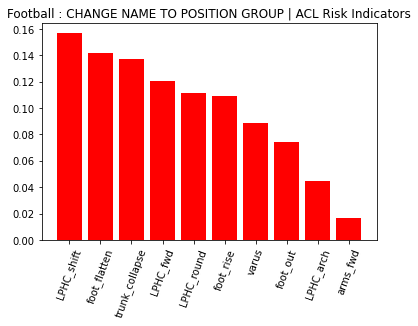

In [211]:
import numpy as np
import matplotlib.pyplot as plt


y = factors[0]
x = factors[1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Football : CHANGE NAME TO POSITION GROUP | ACL Risk Indicators")
plt.bar(x, y,
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.xticks(x, rotation=70)
fb_fig = plt.gcf() 
plt.show()

# Save Plot & Factors

In [212]:
#Be sure to rename the features to the appropriate position group before saving. 
#factors.to_csv('fb_skills.csv')
#!cp fb_skills.csv "drive/My Drive/HPA_Final_Data"
#rename image file
#fb_fig.savefig('fb_skills_varus.png', dpi=300, bbox_inches = "tight")
#!cp fb_skills_varus.png 'drive/My Drive/HPA Final Data/'